In [1]:
import soundfile as sf
import librosa as lb
import librosa.display

import matplotlib.pyplot as plt
import numpy as np

In [2]:
audio, samplerate = sf.read('/home/rajesh/Downloads/trimmed.wav')
audio, samplerate

(array([0.        , 0.        , 0.        , ..., 0.07763672, 0.05557251,
        0.0223999 ]),
 22050)

In [20]:
sample = lb.feature.chroma_stft(y=audio, sr=samplerate)
S = np.abs(lb.stft(audio))
chroma = lb.feature.chroma_stft(S=S, sr=samplerate)

In [21]:
chroma.shape

(12, 10982)

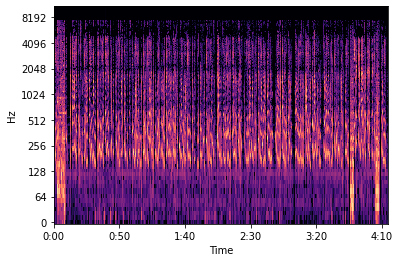

In [24]:
fig, ax = plt.subplots()
img = lb.display.specshow(lb.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time')
plt.savefig('/home/rajesh/Desktop/stft.png', dpi=1200)

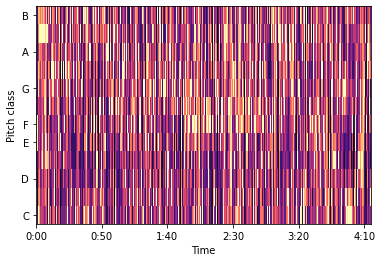

In [25]:
fig, ax = plt.subplots()
img = lb.display.specshow(chroma, y_axis='chroma', x_axis='time')
#fig.colorbar(img)
plt.savefig('/home/rajesh/Desktop/chroma.png', dpi=1200)

In [29]:
from hyperspy.signals import Signal1D

In [35]:
s = Signal1D(chroma)
k = s.decomposition(algorithm="RPCA", output_dimension=12, lambda1=0.1)

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=RPCA
  output_dimension=12
  centre=None


In [41]:
k = s.decomposition(algorithm="ORPCA",
                output_dimension=3,
                method="MomentumSGD",
                subspace_learning_rate=1.1,
                subspace_momentum=0.5)

  0%|          | 0/10982 [00:00<?, ?it/s]

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=ORPCA
  output_dimension=3
  centre=None


In [42]:
k